In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib

In [2]:
# filtering and variable generation
def prepare_data(filename):
    data = pd.read_csv(filename)
    
    print(data['key_id'].count())
    
    # filter
    data = data[(data['stroke_in_order'] == 0) & 
     (data['drawing_time_min'] >= 0) & 
     (data['drawing_time_draw'] > 100)]
    
    print(data['key_id'].count())
    
    data = data[(data['recognized'] == True)]
    print(data['key_id'].count())    
    
    # generate seconds data
    data['dt_sec'] = data['drawing_time_draw'] / 1000.0
    data['dt_sec_floor'] = np.floor(data['dt_sec'])
    
    
    return data
    

In [3]:
def bin_data(data):
    groups = data.groupby('dt_sec_floor')
    counts = groups['dt_sec_floor'].count()
    sizes = counts.to_frame()
    sizes = sizes.rename(columns = {'dt_sec_floor':'count'})
    sizes = sizes.reset_index()
    sizes = sizes.rename(columns = {'dt_sec_floor':'x0'})
    alltotal = data['key_id'].count()

    sizes['x1'] = sizes['x0'] + 1
    sizes['freq'] = sizes['count'] / alltotal
    #sizes = sizes.round({'freq': 3})

    #sizes.describe()

    return sizes

In [27]:
def to_hist(data):
    hist = data.T.to_dict().values()
    return list(hist)

In [31]:
def get_drawings_dict(d_key):
    filename = "/Users/vlandham/code/data/quickdraw/simplified/" + d_key + ".ndjson"
    
    by_key_id = {}
    with open(filename) as f:
        for line in f:
            drawing = json.loads(line)
            by_key_id[drawing['key_id']] = drawing
    return by_key_id



def get_drawing_ids_dict(data, count, max_bin):
    groups = data.groupby('dt_sec_floor')
    drawing_ids = groups['key_id'].apply(lambda x:  x.sample(n = count) if len(x) > count else x.sample(n = len(x)))
    drawing_ids = drawing_ids.reset_index()
    drawing_id_dict = {}
    for idx, row in drawing_ids.iterrows():
    
        key = int(row['dt_sec_floor'])
        if (key not in drawing_id_dict):
            drawing_id_dict[key] = []
        drawing_id_dict[key].append(row['key_id'])
    return drawing_id_dict
    
    
def get_drawings(key_id, data, count, max_bin):
    drawing_id_dict = get_drawing_ids_dict(data, count, max_bin)
    
    drawings_dict = get_drawings_dict(key_id)
    
    drawings = {}
    
    for key, ids in drawing_id_dict.items():
        drawings[key] = []
        for d_id in ids:
            drawings[key].append(drawings_dict[str(int(d_id))])
    return drawings
        
    

In [25]:
def write_results(output):
    filename = "data/" + "_".join(output['keys']) + "_out.json"
    with open(filename, 'w') as outfile:
        json.dump(output, outfile)
    

In [32]:
keys = ['dog', 'cat']

output = {"keys": keys}

for key_id in keys:
    
    
    filename = "data/" + key_id +".stats.csv"
    data = prepare_data(filename)
    bins = bin_data(data)
    hist = to_hist(bins)
    
    output[key_id] = {}
    output[key_id]['hist'] = hist
    output[key_id]['drawings'] = get_drawings(key_id, data, 20, 25)


152159
151962
143102
123202
123077
102943


In [33]:
write_results(output)

In [ ]:
def 

In [14]:
#get_drawings(key_id, data, 20, 25)
ddd = get_drawings_dict('dog')

In [17]:
list(ddd.keys())[0]

'6718004173733888'

In [159]:

### groups = data.groupby('dt_sec_floor')

#id_groups = drawing_ids.groupby('dt_sec_floor')


drawing_ids


    #print(row['key_id'])
len(drawing_id_dict.keys())
#drawing_ids.droplevel(level=1)
#for name in groups.index:
#    print(name)

drawing_id_dict[1]

[6590923892850688.0,
 6642421054046208.0,
 5570970460880896.0,
 5241625590628352.0,
 4561006405615616.0,
 5052854513434624.0,
 4688048988094464.0,
 6618756992204800.0,
 6196053143453696.0,
 5849672029569024.0,
 6037578996252672.0,
 5528859766161408.0,
 5623599496953856.0,
 6043774943756288.0,
 4535688659730432.0,
 5767540645036032.0,
 6638410879991808.0,
 5402468659757056.0,
 5452123196096512.0,
 4789399659216896.0]

In [117]:

hist = bins.T.to_dict().values()
for val in hist:
    print(val['x0'])
#sizes.reset_index()
#sizes.columns()
#sizes = pd.DataFrame(data =counts)

#counts.columns('x0', 'count')
#sizes.columns('x0')
#bins['freq'] = bins['key_id'] / data['key_id'].count()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
26.0
27.0
29.0
30.0
44.0
69.0


In [119]:
output = {'keys': []}

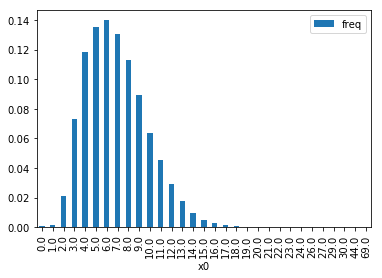

In [97]:
sizes.plot.bar(x = 'x0', y = 'freq')